In [45]:
import numpy as np
import pandas as pd

data = pd.read_csv("weatherAUS.csv")
data.drop(["RISK_MM"], axis=1, inplace=True)
data.drop(["Location"], axis=1, inplace=True)
data.drop(["Date"], axis=1, inplace=True)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Lets have a look in the data..

In [46]:
print("""
No of columns: {}
No of rows: {}
No of categorical columns: {}
No of numerical columns: {}""".format(data.shape[1], 
                                      data.shape[0],
                                      len(data.select_dtypes('O').columns),
                                      len(data.select_dtypes(['int64', 'float']).columns)))


No of columns: 21
No of rows: 142193
No of categorical columns: 5
No of numerical columns: 16


In [47]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


We see thare are many missing values as count shows above, so we need to process missing values. 1st let see how many missing values are extactly there


In [48]:
pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])

,Missing Values
MinTemp,637
MaxTemp,322
Rainfall,1406
Evaporation,60843
Sunshine,67816
WindGustDir,9330
WindGustSpeed,9270
WindDir9am,10013
WindDir3pm,3778
WindSpeed9am,1348


Above, we see Sunshine has most missing value. So we consider dropping thes rows and let see the missing values again.

In [49]:
threshold = 0.4

# Dropping columns with missing value rate higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]

In [50]:
# Dropping rows with missing value rate higher than threshold
data = data.loc[data.isnull().mean(axis=1) < threshold]
#data

Lets see missing values once again. Now we need some imputing. 

In [51]:
pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])

,Missing Values
MinTemp,260
MaxTemp,177
Rainfall,1148
WindGustDir,7703
WindGustSpeed,7646
WindDir9am,8687
WindDir3pm,2208
WindSpeed9am,350
WindSpeed3pm,1073
Humidity9am,1252


In [24]:
#Fill all numerical columns
num_cols = data.select_dtypes(['int64', 'float']).columns
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())
    
pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])

,Missing Values
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,9330
WindGustSpeed,0
WindDir9am,10013


Wow, we are almost done. Now only 4 columns has missing values and all are categorical fields. So now we need to impute them.

In [61]:
data.select_dtypes('O').columns
# Dropping rows with missing value rate higher than threshold
threshold = 0.03
data = data.loc[data.isnull().mean(axis=1) < threshold]
pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])

,Missing Values
MinTemp,0
MaxTemp,0
Rainfall,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0


<Figure size 432x288 with 0 Axes>

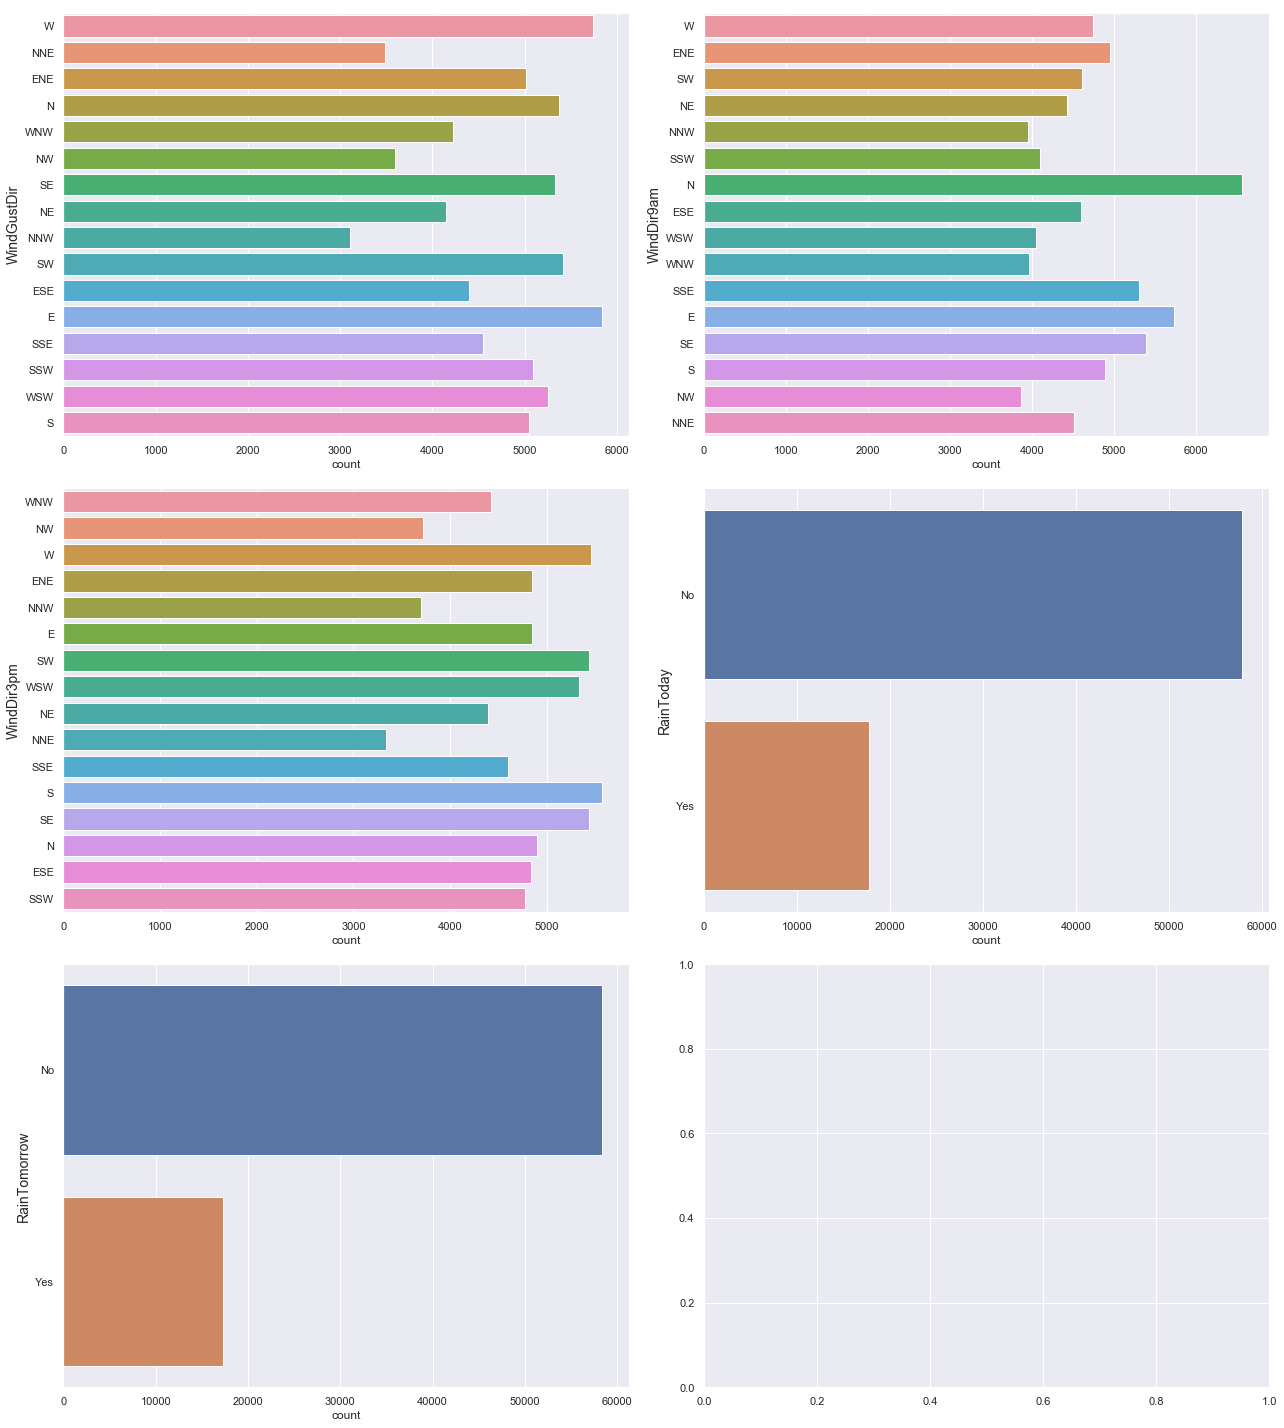

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import numpy as np
import warnings
warnings.filterwarnings('ignore')

cat_cols = data.select_dtypes('O').columns

def count_plot(data, features):
    i = 0
    plt.figure()
    col = 2
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(18,20))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        ax = sns.countplot(data=data,y=feature)
        ax.set_yticklabels(ax.get_yticklabels())
        plt.tight_layout()
        plt.ylabel(feature, fontsize=14)
    plt.show();
    
count_plot(data, cat_cols)

<Figure size 432x288 with 0 Axes>

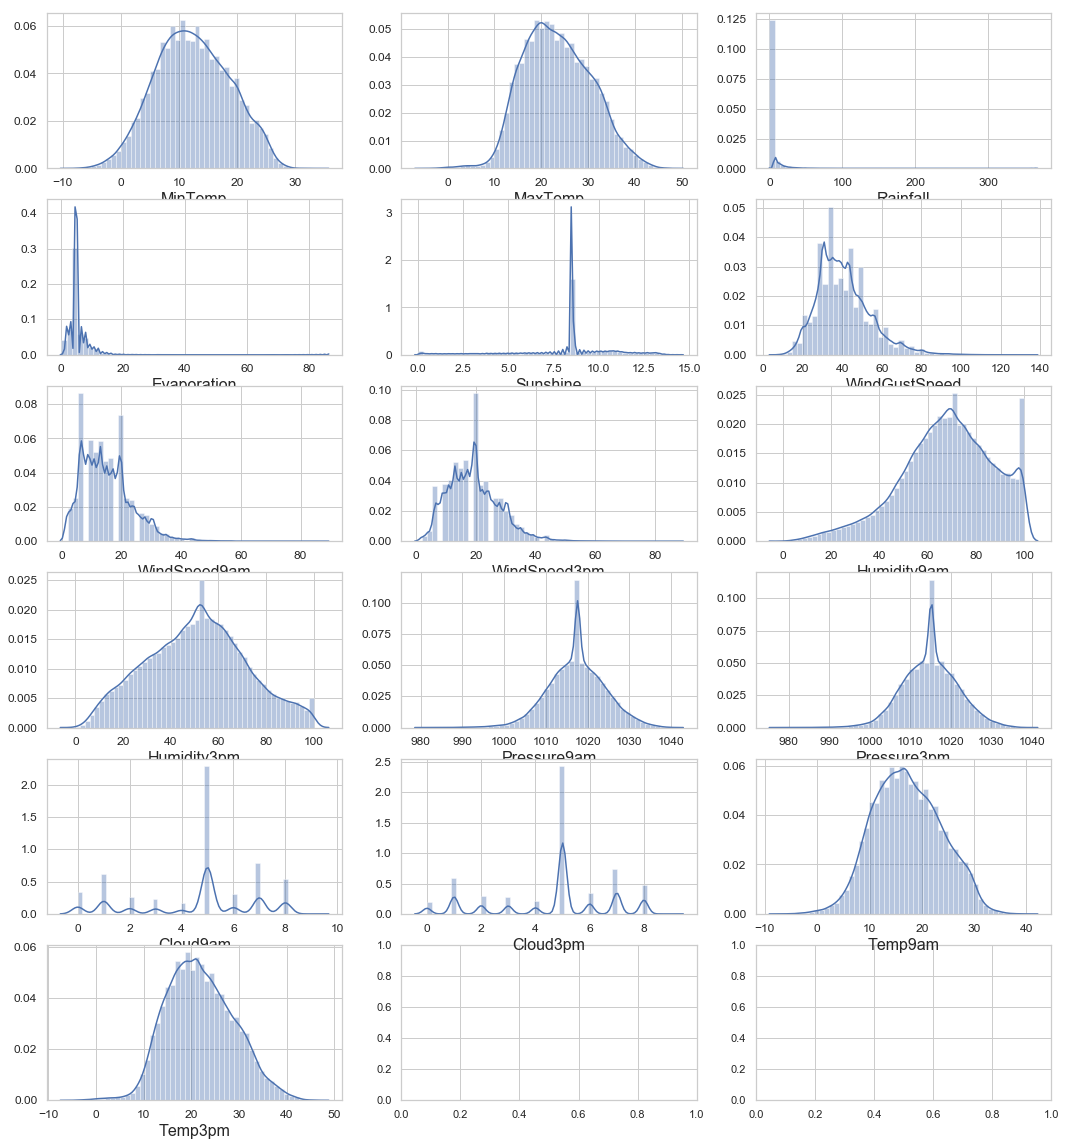

In [26]:
def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(18,20))
    sns.set_style("whitegrid")

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.distplot(data[feature])
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();

##plot_distribution(data, data.select_dtypes(['int64', 'float']).columns)
##data.select_dtypes(['int64', 'float']).columns


plot_distribution(data, num_cols)

Well distributed column
MinTemp
MaxTemp
Humidity9am
Humidity3am
Temp9am
Temp3pm
Pressure9am
Pressure3am

Bad distributed
rainfall
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Cloud9am

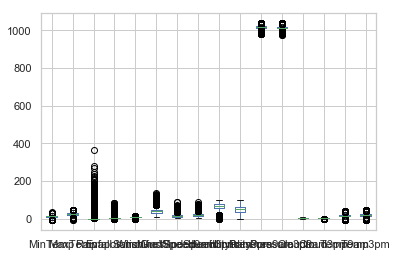

In [28]:
data.plot.box(data['MinTemp']);

In [14]:
def detect_outlier(feature):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    
    return feature.index[(feature<lower_bound)|(feature>upper_bound)].tolist()

In [55]:
# for col in num_cols:
#     print(col,'-->',detect_outlier(data[col]))

In [16]:
#Caping the outliers
for col in num_cols:
    indx = detect_outlier(data[col])
    data[col].loc[indx] = data[col].median()

In [58]:
#Droping the rows that contain outliers
# for col in num_cols:
#     indx = detect_outlier(data[col])
#     data[col].loc[indx] = np.nan
# data.dropna(inplace=True)
# data

ValueError: cannot convert float NaN to integer

<Figure size 432x288 with 0 Axes>

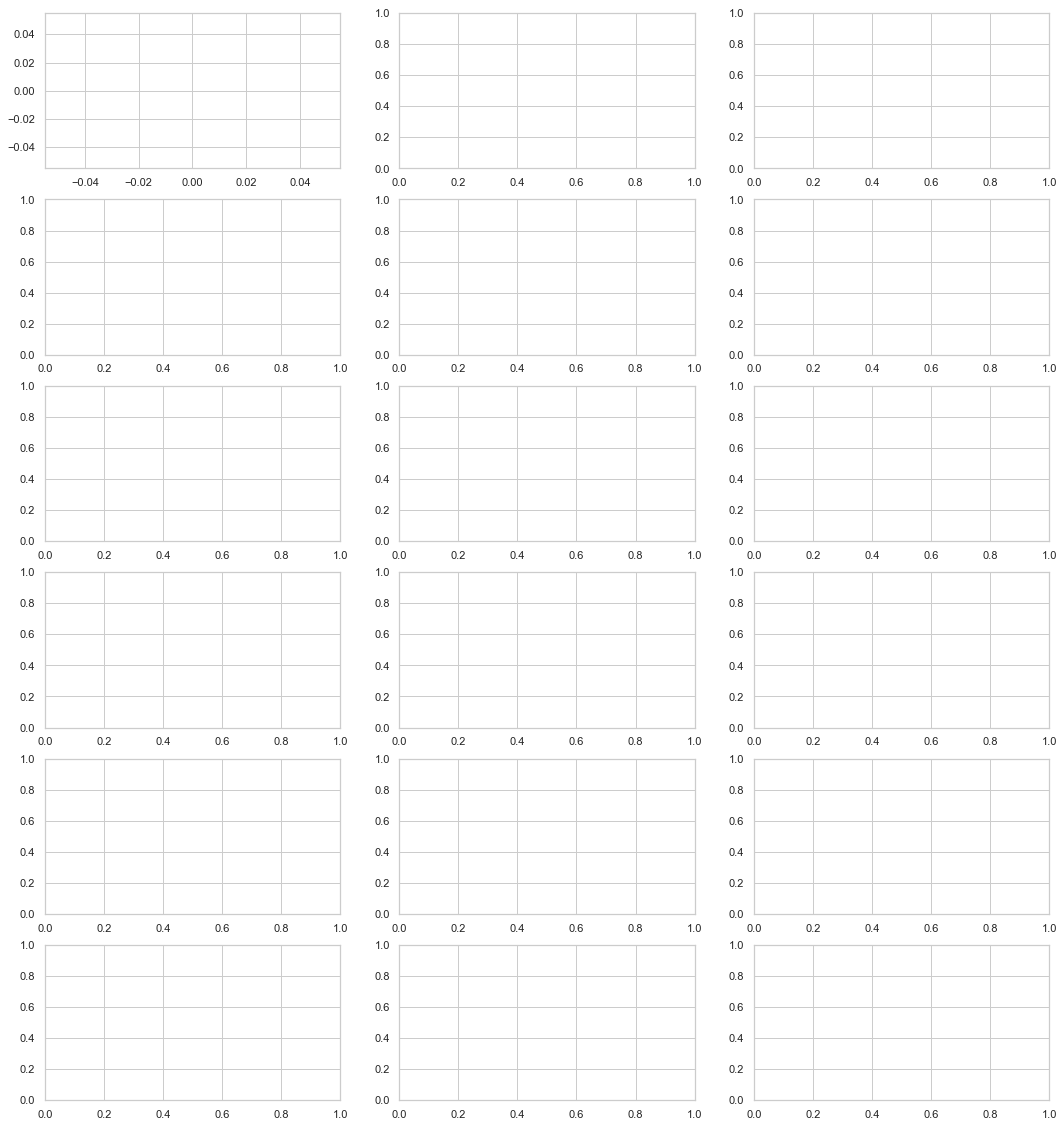

In [60]:
plot_distribution(data, num_cols)

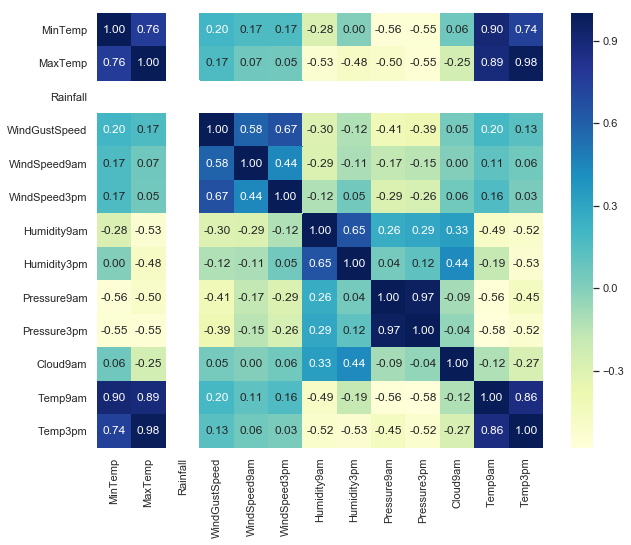

In [62]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".2f", cmap="YlGnBu");

In [43]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,4.8,8.5,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,No,No
10,2008-12-11,Albury,13.4,30.4,0.0,4.8,8.5,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,5.0,5.0,20.4,28.8,No,Yes
18,2008-12-20,Albury,9.8,25.6,0.0,4.8,8.5,SSE,26.0,SE,...,45.0,26.0,1019.2,1017.1,5.0,5.0,15.8,23.2,No,No


In [81]:
X = data.loc[:, data.columns!='RainTomorrow']
y = data.loc[:, data.columns=='RainTomorrow']

In [88]:
for col in y:
    y[col] = y[col].astype('category')
    print(col,'---->', dict(enumerate(y[col].cat.categories)))
    y[col] = y[col].cat.codes

RainTomorrow ----> {0: 'No', 1: 'Yes'}


In [89]:
y.head()

,RainTomorrow
6,0
15,1
22,0
72,1
84,0


In [92]:
x_cat_cols = X.select_dtypes('O').columns
X_encoded = pd.get_dummies(X, columns=x_cat_cols, prefix=x_cat_cols)

print("Now our dataset has {} columns.".format(X_encoded.shape[1]))
X_encoded.head()

Now our dataset has 62 columns.


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,...,0,0,0,0,0,0,1,0,0,1
15,14.1,20.9,0.0,22.0,11.0,9.0,69.0,82.0,1012.2,1010.4,...,0,0,0,0,0,0,0,0,0,1
22,15.3,30.9,0.0,33.0,6.0,13.0,55.0,23.0,1011.0,1008.2,...,1,0,0,0,0,0,0,0,0,1
72,16.1,21.6,0.0,46.0,11.0,15.0,58.0,69.0,1017.0,1017.3,...,0,0,0,0,0,0,0,0,0,1
84,12.9,29.6,0.0,46.0,7.0,24.0,54.0,14.0,1014.0,1012.7,...,0,0,0,0,0,0,0,1,0,1


(47977, 64)

In [93]:
#Normalize data
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
scaler.fit(X_encoded.values)
X_standered = scaler.transform(X_encoded.values)
X_scaled = pd.DataFrame(X_standered, columns=X_encoded.columns)

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=1234)

print("""
X_train has {} data points.
y_train has {} data points.
X_test has {} data points.
y_test has {} data points.
""".format(X_train.shape[0], y_train.shape[0], X_test.shape[0], y_test.shape[0]))


X_train has 38381 data points.
y_train has 38381 data points.
X_test has 9596 data points.
y_test has 9596 data points.



## Step 4: Modeling
### Logistic Regression in Scikit-learn

In [95]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

# y_pred = lr.predict(X_test)
# y_pred

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [96]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [97]:
pd.DataFrame({'true': y_test.values.ravel(), 
             'pred': y_pred.ravel()}).head(10)

,true,pred
0,1,0
1,0,0
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [98]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("The accuracy score is {}".format(acc))

The accuracy score is 0.8685910796165068
